In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target
print('class labels:', np.unique(y)) #devuelve las tres unicas etiquetas de clase almacenadas en iris.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

#dividimos de forma aleatoria las matrices x e y en un 30% de datos de prueba(45 datos) y un 70% de datos de entrenamiento(105 muestras).
#random_state = 1, garantiza que nuestros resultados sean reproducibles
print('labels counts in y:', np.bincount(y))#cuanto los numeros de coincidencia de cada valor en una matriz
print('labels counts in y_train:', np.bincount(y_train))
print('labels counts in y_test:', np.bincount(y_test))
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)
lr = LogisticRegression(C=100.0, random_state=1)#regresión logistica
lr.fit(X_train_std, y_train)#entrenando

class labels: [0 1 2]
labels counts in y: [50 50 50]
labels counts in y_train: [35 35 35]
labels counts in y_test: [15 15 15]


LogisticRegression(C=100.0, random_state=1)

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx= None, resolution = 0.2):
    """funcion para graficar"""
    #marcador y mapas de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #repesenta la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid( np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha= 0.3, cmap= cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl)
        
    #destaca las muestras de prueba
    if test_idx:
        # representa todas las muestras
        X_test, Y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='red', edgecolor='purple', alpha=0.3,
                   linewidths=1, marker='o',
                   s=100, label='test set')

In [4]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

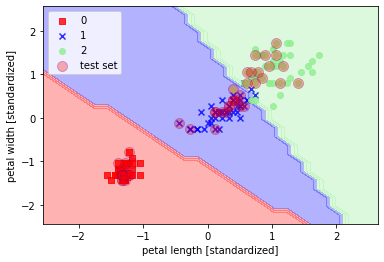

In [5]:
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx= range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [6]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

# Regresion Logistica Binaria 

In [7]:
X_train_01_subjet = x_train[(y_train==0)|(y_train==1)]
y_train_01_subjet = y_train[(y_train==0)|(y_train==1)]

In [8]:
lr.fit(X_train_01_subjet, y_train_01_subjet)

LogisticRegression(C=100.0, random_state=1)

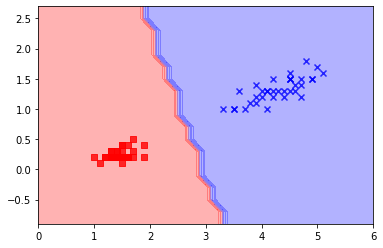

In [9]:
plot_decision_regions(X_train_01_subjet, y_train_01_subjet, classifier=lr)

# SVM

In [10]:
from sklearn.svm import SVC

In [11]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

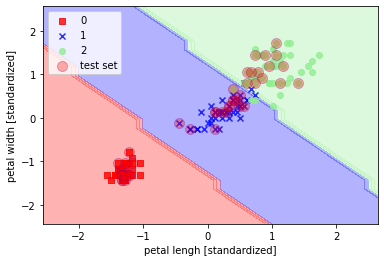

In [12]:
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal lengh [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# SVM Kernelizada

## metodos kernel para datos inseparables: compuerta XOR

In [13]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0]> 0,
                      X_xor[:, 1]> 0)# 100 muestras para clase 1 y 100 para la clase 0

In [14]:
y_xor = np.where(y_xor, 1, -1)

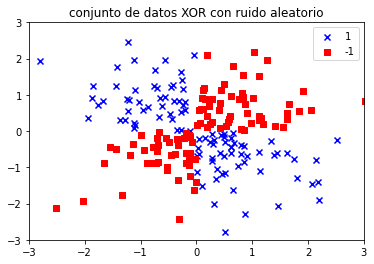

In [15]:
#grafica
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c='b', marker='x',
           label='1')
plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c='r', marker='s',
           label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.title('conjunto de datos XOR con ruido aleatorio')
plt.show()

### entrenando una SVM kernelizada

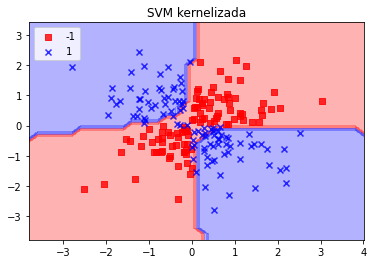

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.title('SVM kernelizada')
plt.show()

gamma=0.1 es el parametro de corte  para la esfera Gaussiana.
rbf= funcion de base radial

# Aprendizaje basado en arboles de decision

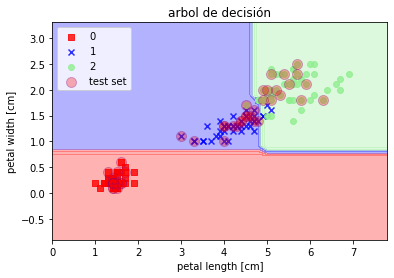

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             random_state=1)
tree.fit(x_train, y_train)
X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                     y_combined,
                     classifier=tree,
                     test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('arbol de decisión')
plt.show()

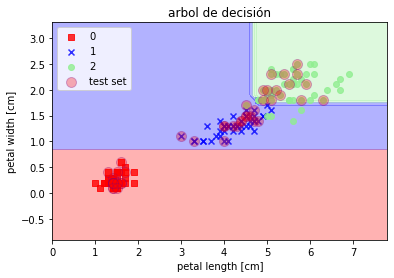

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                             max_depth=3, # podamos el arbol
                             random_state=1)
tree.fit(x_train, y_train)
X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                     y_combined,
                     classifier=tree,
                     test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('arbol de decisión')
plt.show()

# Random forest(bosques aleatoreos)

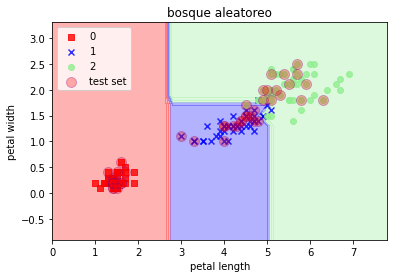

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25,# 25 arboles de decision
                               random_state=1,
                               n_jobs=2)#permite paralelizar el ordenador en dos nucleos 
forest.fit(x_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.title('bosque aleatoreo')
plt.show()
#hemos utilizado el criterio de entropia medida de impureza
#bosque pequeño con conjunto de datos pequeño

# K-vecinos mas ercanos(KNN)

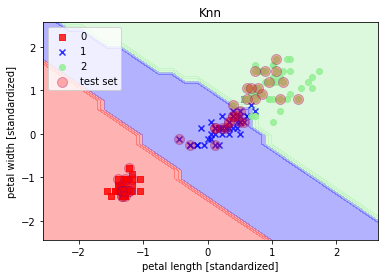

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, #vecinos, 
                           p=2,
                          metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                     classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('Knn')
plt.show()